In [1]:
# LAB_DATA_IMBALANCE_CLASS_ANDRE_CONDE

In [2]:
# 1. Import the required libraries and modules that you would need.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
# 2. Read that data into Python and call the dataframe churnData.

In [5]:
churnData = pd.read_csv("Customer-churn.csv")
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [6]:
# 3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. 
# Convert this column into numeric type using pd.to_numeric function.

In [7]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [8]:
churnData["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
churnData["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
churnData["TotalCharges"].isna().sum()

0

In [11]:
churnData["TotalCharges"] = churnData["TotalCharges"].replace(" ", float("NaN"))
churnData["TotalCharges"] = churnData["TotalCharges"].astype(float)
churnData = churnData.dropna(subset=["TotalCharges"])

In [12]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [13]:
# 4. Check for null values in the dataframe. Replace the null values.

In [14]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# 5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
#   5.1 Scale the features either by using normalizer or a standard scaler.
#   5.2 Split the data into a training set and a test set.
#   5.3 Fit a logistic regression model on the training data.
#   5.4 Check the accuracy on the test data.

In [16]:
churnData.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes


In [17]:
churnData["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [18]:
churnData["SeniorCitizen"].unique()

array([0, 1])

In [19]:
churnData["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [20]:
churnData["MonthlyCharges"].value_counts()

20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64

In [21]:
churnData["TotalCharges"].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [22]:
cont_var = churnData[["TotalCharges", "MonthlyCharges"]]
cont_var

,TotalCharges,MonthlyCharges
0,29.85,29.85
1,1889.50,56.95
2,108.15,53.85
3,1840.75,42.30
4,151.65,70.70
...,...,...
7038,1990.50,84.80
7039,7362.90,103.20
7040,346.45,29.60
7041,306.60,74.40


In [23]:
X = cont_var

transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

(7032, 2)


In [24]:
X_norm = pd.DataFrame(x_minmax,index = X.index, columns=X.columns)
X_norm.head()

,TotalCharges,MonthlyCharges
0,0.001275,0.115423
1,0.215867,0.385075
2,0.010310,0.354229
3,0.210241,0.239303
4,0.015330,0.521891


In [25]:
churnData["Churn"] = churnData["Churn"].replace({"Yes": 1, "No": 0})
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1


In [26]:
cat = churnData[["tenure", "SeniorCitizen"]]

In [27]:
model = pd.concat([X_norm, cat], axis = 1)
model.head()

,TotalCharges,MonthlyCharges,tenure,SeniorCitizen
0,0.001275,0.115423,1,0
1,0.215867,0.385075,34,0
2,0.010310,0.354229,2,0
3,0.210241,0.239303,45,0
4,0.015330,0.521891,2,0


In [28]:
X = model
y = churnData["Churn"]

In [29]:
model.isna().sum()

TotalCharges      0
MonthlyCharges    0
tenure            0
SeniorCitizen     0
dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [31]:
classification = LogisticRegression(random_state=0).fit(X_train, y_train)

In [33]:
predictions = classification.predict(X_test)

In [34]:
pd.Series(predictions).value_counts()

0    1710
1     400
dtype: int64

In [35]:
y_test.value_counts()

0    1534
1     576
Name: Churn, dtype: int64

In [36]:
confusion_matrix(y_test, predictions)

array([[1399,  135],
       [ 311,  265]])

In [37]:
cm = confusion_matrix(y_test,predictions)

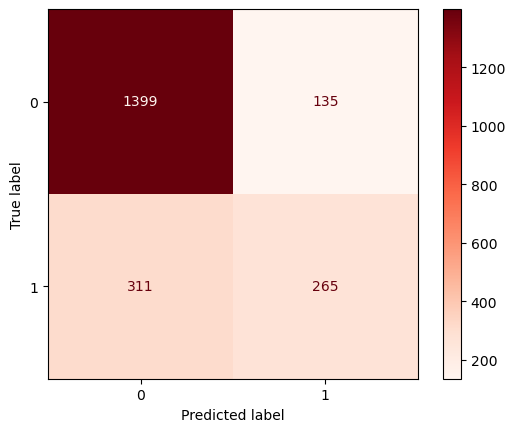

In [38]:
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.show()

In [39]:
classification.score(X_test, y_test)

0.7886255924170616

In [40]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.79



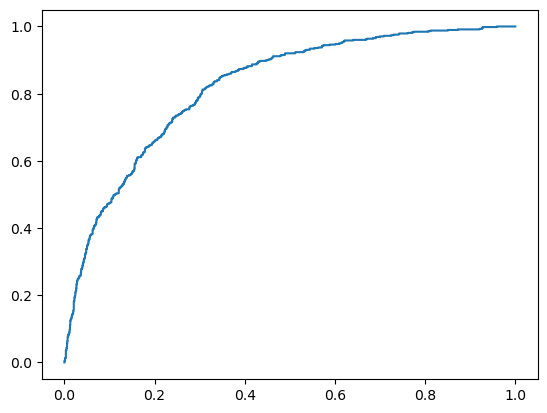

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

The accuracy of the model on test set is: 0.79 
[[1399  135]
 [ 311  265]]


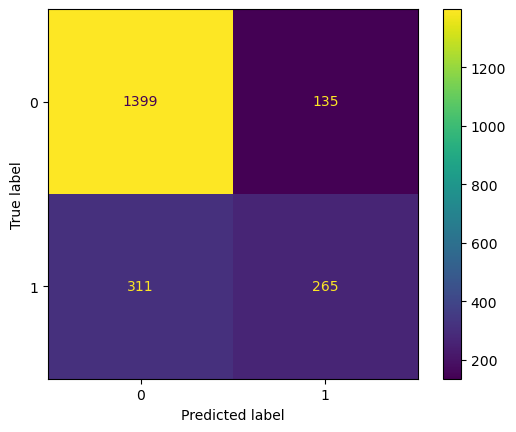

The Kappa of your model is: 0.41


In [42]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show()  
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Downsampling

In [44]:
rus = RandomUnderSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_rus, y_rus = rus.fit_resample(X, y)

In [45]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)


X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7486631016042781

In [46]:
# UpSampling

In [47]:
ros = RandomOverSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_ros, y_ros = ros.fit_resample(X, y)

In [48]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7256294383473209

In [ ]:
# worse with up and downsampling